In [6]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
car_data = pd.read_csv('car data.csv')

In [10]:
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [12]:
car_data.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


In [25]:
car_data.dropna(inplace=True)

In [26]:
car_data.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,0
fuel_type,0


In [13]:
car_data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [14]:
car_data.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [15]:
print(car_data['fuel_type'].value_counts())
fuel_type = car_data['fuel_type']
selling_price = car_data['Price']

fuel_type
Petrol    440
Diesel    395
LPG         2
Name: count, dtype: int64


In [16]:
from matplotlib import style

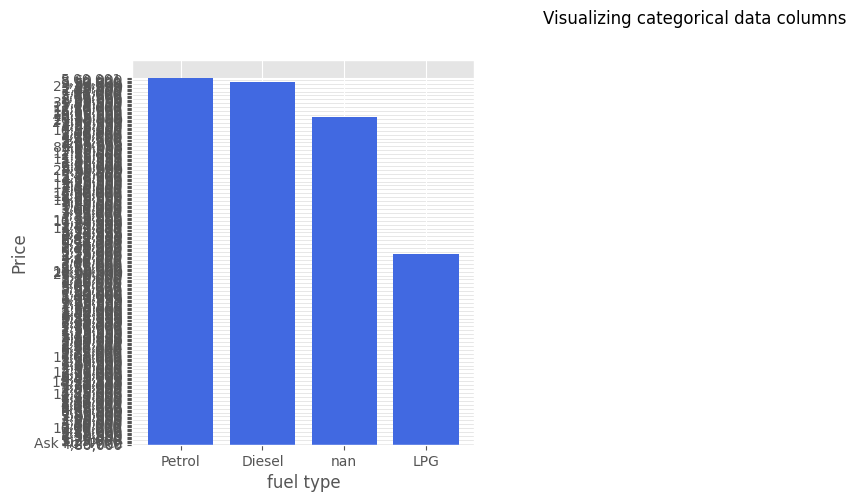

In [18]:
# style.use('ggplot')
# fig = plt.figure(figsize=(15,5))
# fig.suptitle('Visualizing categorical data columns')
# plt.subplot(1,3,1)
# plt.bar(fuel_type,selling_price, color='royalblue')
# plt.xlabel("fuel type")
# plt.ylabel("Price")
# plt.subplot(1,3,2)
# plt.bar(kms_driven, selling_price, color='red')
# plt.xlabel("Seller Type")
# plt.subplot(1,3,3)

# plt.show()

from matplotlib import style
import matplotlib.pyplot as plt # Import the pyplot module

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)

# Convert fuel_type to strings
fuel_type = car_data['fuel_type'].astype(str)

plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("fuel type")
plt.ylabel("Price")

plt.show()

In [20]:
petrol_data = car_data.groupby('fuel_type').get_group('Petrol')
petrol_data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,440,440,440,440,440,440
unique,254,21,21,176,154,1
top,Honda City,Maruti,2014,Ask For Price,"45,000 kms",Petrol
freq,10,166,50,12,21,440


In [22]:
petrol_data = car_data.groupby('fuel_type').get_group('Diesel')
petrol_data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,395,395,395,395,395,395
unique,230,23,19,191,157,1
top,Mahindra Scorpio S10,Mahindra,2015,"3,50,000","35,000 kms",Diesel
freq,9,96,67,11,16,395


TypeError: can't multiply sequence by non-int of type 'float'

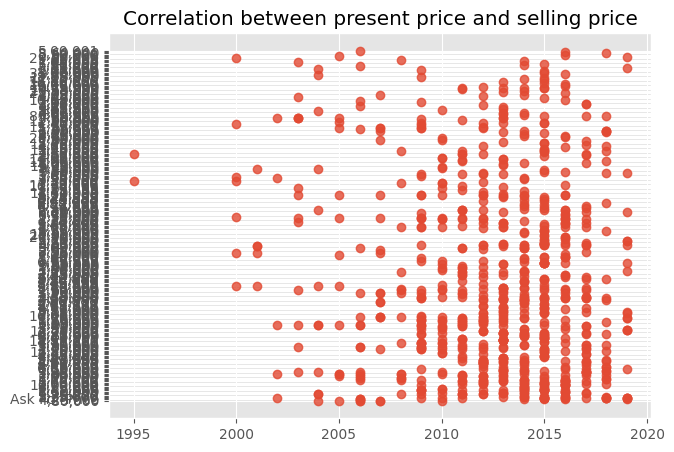

In [39]:
#manual encoding
# car_data.replace({'fuel_type':{'Petrol':0, 'Diesel':1}}, inplace=True) # Replace values in 'fuel_type' column, not 'year'

# Convert 'year' column to numeric type
car_data['year'] = pd.to_numeric(car_data['year'])

fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='year', y='Price', data=car_data)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

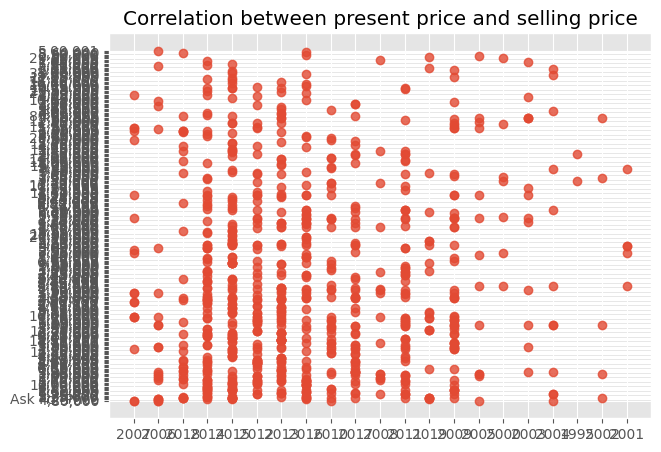

In [28]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='year', y='Price', data=car_data)

In [30]:
X = car_data.drop(['name','Price'], axis=1)
y = car_data['Price']
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (837, 4)
Shape of y is:  (837,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [36]:
# print("X_test shape:", X_test.shape)
# print("X_train shape:", X_train.shape)
# print("y_test shape: ", y_test.shape)
# print("y_train shape:", y_train.shape)

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#remove commas and 'kms' from 'kms_driven' column
car_data['kms_driven'] = car_data['kms_driven'].str.replace(',', '').str.replace('kms', '').astype(float)

# Encode the 'company' column using one-hot encoding
car_data = pd.get_dummies(car_data, columns=['company'])

X = car_data.drop(['name','Price'], axis=1)
y = car_data['Price']
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

AttributeError: Can only use .str accessor with string values!